## *1. Define machine learning terms*

* **dataset** -- A dataset is simply a collection of related data. Examples include but are not limited to book text, genomic information, financial histories, and geographical loci.


* **training, testing, validation datasets** -- A training set is a portion of the dataset that is used to "imprint" the model with the data (it is the portion that the model learns from). The testing set is a set used to measure the performance of the model in a "real world" simulation by showing the model can correctly respond to data it hasn't seen. The validation set is a portion used to tune the hyperparameters of the model after the the training set pass (can be used to detect overfitting). 


* **ground truth, label** -- Ground truth is the 'correct' prediction from the data when appraised by humans. The label is just the name of the datapoint, but may also correspond to the ground truth as in the module 1 notebook.


* **pre-processing, feature, numerical, nominal** -- Pre-processing is the process of setting-up/correcting the dataset for use in the model. A feature is just a data point in the dataset. Numerical data has a quantitative value (like monetary values); nominal data has no quantitative value (like text).


* **decision surface** -- Is the hyperplane generated by a model that separates data points into separate classes.


* **model validation, accuracy, cross-validation** -- Model validation is the process of feeding withheld data to the model to verify its accuracy with new data and can be used to tune hyperparameters. Accuracy is how well the model predicts real world data. Cross-validation is the use of data outside of the sample dataset to validate the model.

## *2. Describe two scikit-learn datasets*

* **load_breast_cancer** -- 

    569 datapoints
    
    30 features all of which are represented as real, positive floating point numbers
    
    2 categories - benign and malignant
    
    'mean radius' mean = 14.1273; 'mean texture' mean = 19.2896
    
    
* **load_wine** -- 

    178 datapoints
    
    13 features all of which are represented as real, positive floating point numbers
    
    3 categories - class_0, class_1, class_2
    
    'alcohol' mean = 13.0006; 'malic acid' mean = 2.3363
    

#### Imports and base configs for entire notebook

In [1]:
from sklearn import datasets, naive_bayes, tree, metrics
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import random

sns.set(style="ticks", color_codes=True)

#### Exploring datasets

In [2]:
def characterize_data(sk_data):
    print(f"Datapoints = {len(sk_data.data)}")

    print(f"Feature num = {len(sk_data.data[0])}")
    print(f"Feature names = {sk_data.feature_names}")
    types = []
    for dp in sk_data.data[0]:
        types.append(type(dp))
    print(f"Data types: {set(types)}")

    print(f"Categories: {sk_data.target_names}")

    sum0 = [sk_data.data[x][0] for x in range(len(sk_data.data))]
    print(f"\'{sk_data.feature_names[0]}\' mean = {np.mean(sum0)}")

    sum1 = [sk_data.data[x][1] for x in range(len(sk_data.data))]
    print(f"\'{sk_data.feature_names[1]}\' mean = {np.mean(sum1)}")
    
bc = datasets.load_breast_cancer()    
wine = datasets.load_wine()

characterize_data(bc)

print("\n")

characterize_data(wine)

Datapoints = 569
Feature num = 30
Feature names = ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Data types: {<class 'numpy.float64'>}
Categories: ['malignant' 'benign']
'mean radius' mean = 14.127291739894552
'mean texture' mean = 19.289648506151142


Datapoints = 178
Feature num = 13
Feature names = ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_dilute

## *3. Use the code and answer the questions*

* From the iris dataset petal width and petal length have the least overlap and give us the most promising discriminating power.

* For the breast cancer dataset, I had to be a little creative and chunked the data into viewable portions. While this ignores some of the possible combinations available to us, I think it still gives a good snapshot of the data. This dataset has several features that would appear to work well in predicton of malignancy. "Mean concave points" and "worst concave points" produce a good distinction between groups and are thus very promising.

* In the wines dataset, I removed some features that tended to not produce clear distinctions between classes. The two best features to use from this dataset are "proline" and "hue." Proline produces clear separation between class_0 and the other two. Hue produces clear distinction between class_3 and the other two. 

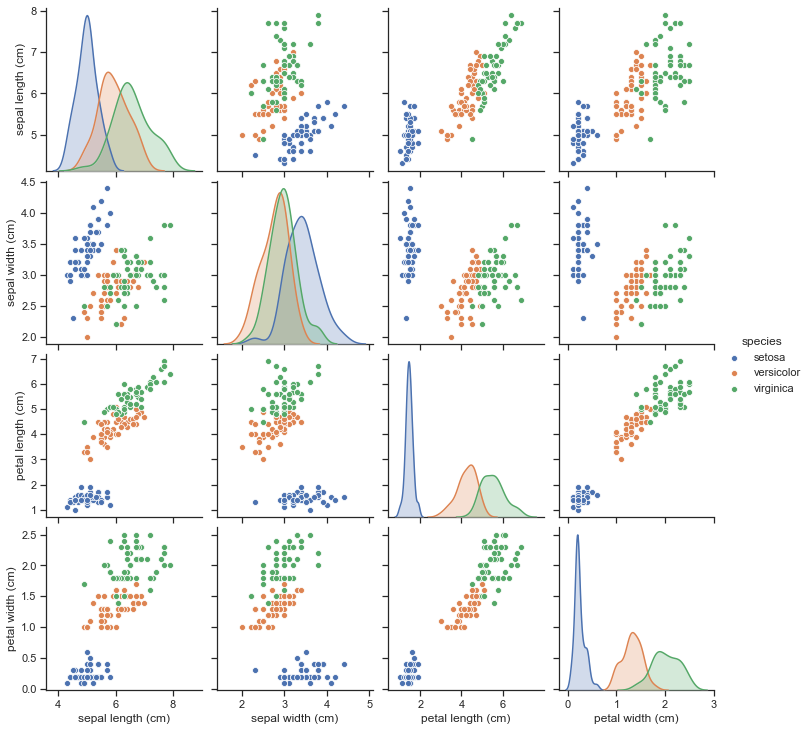

In [3]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(data=np.c_[iris.data, [iris.target_names[v] for v in iris.target]],
                       columns= iris.feature_names + ['species'])

cols = iris_df.columns.drop('species')

iris_df[cols] = iris_df[cols].apply(pd.to_numeric)
g = sns.pairplot(iris_df, hue='species')

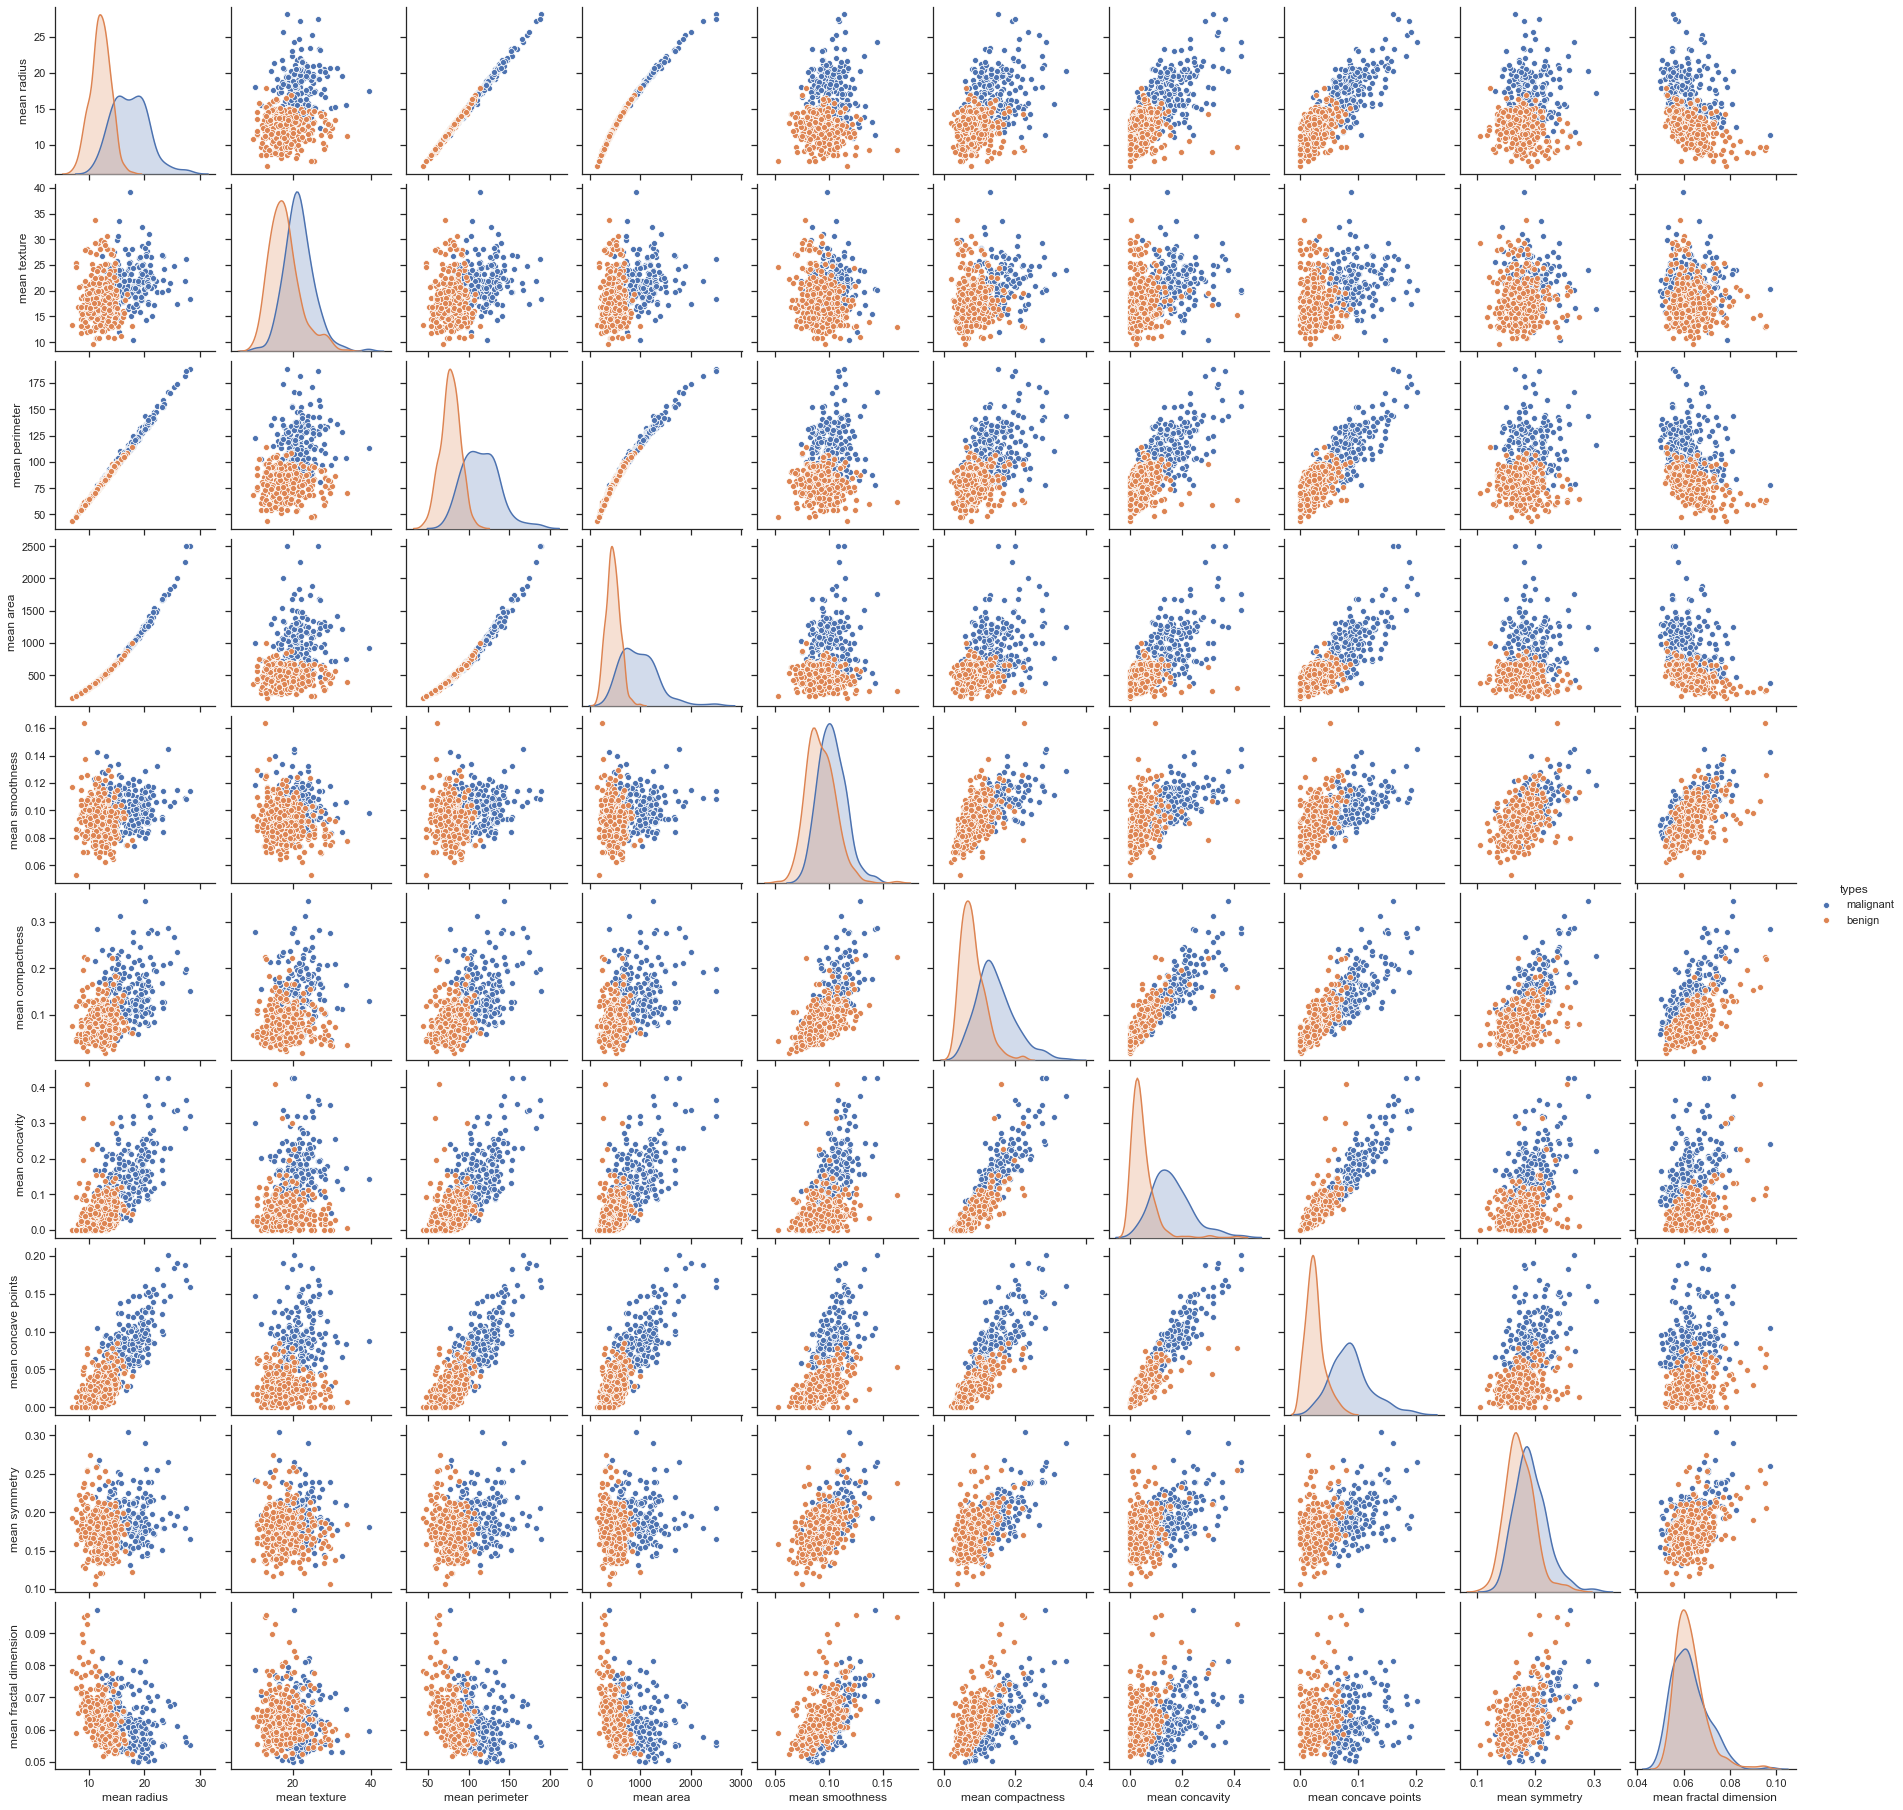

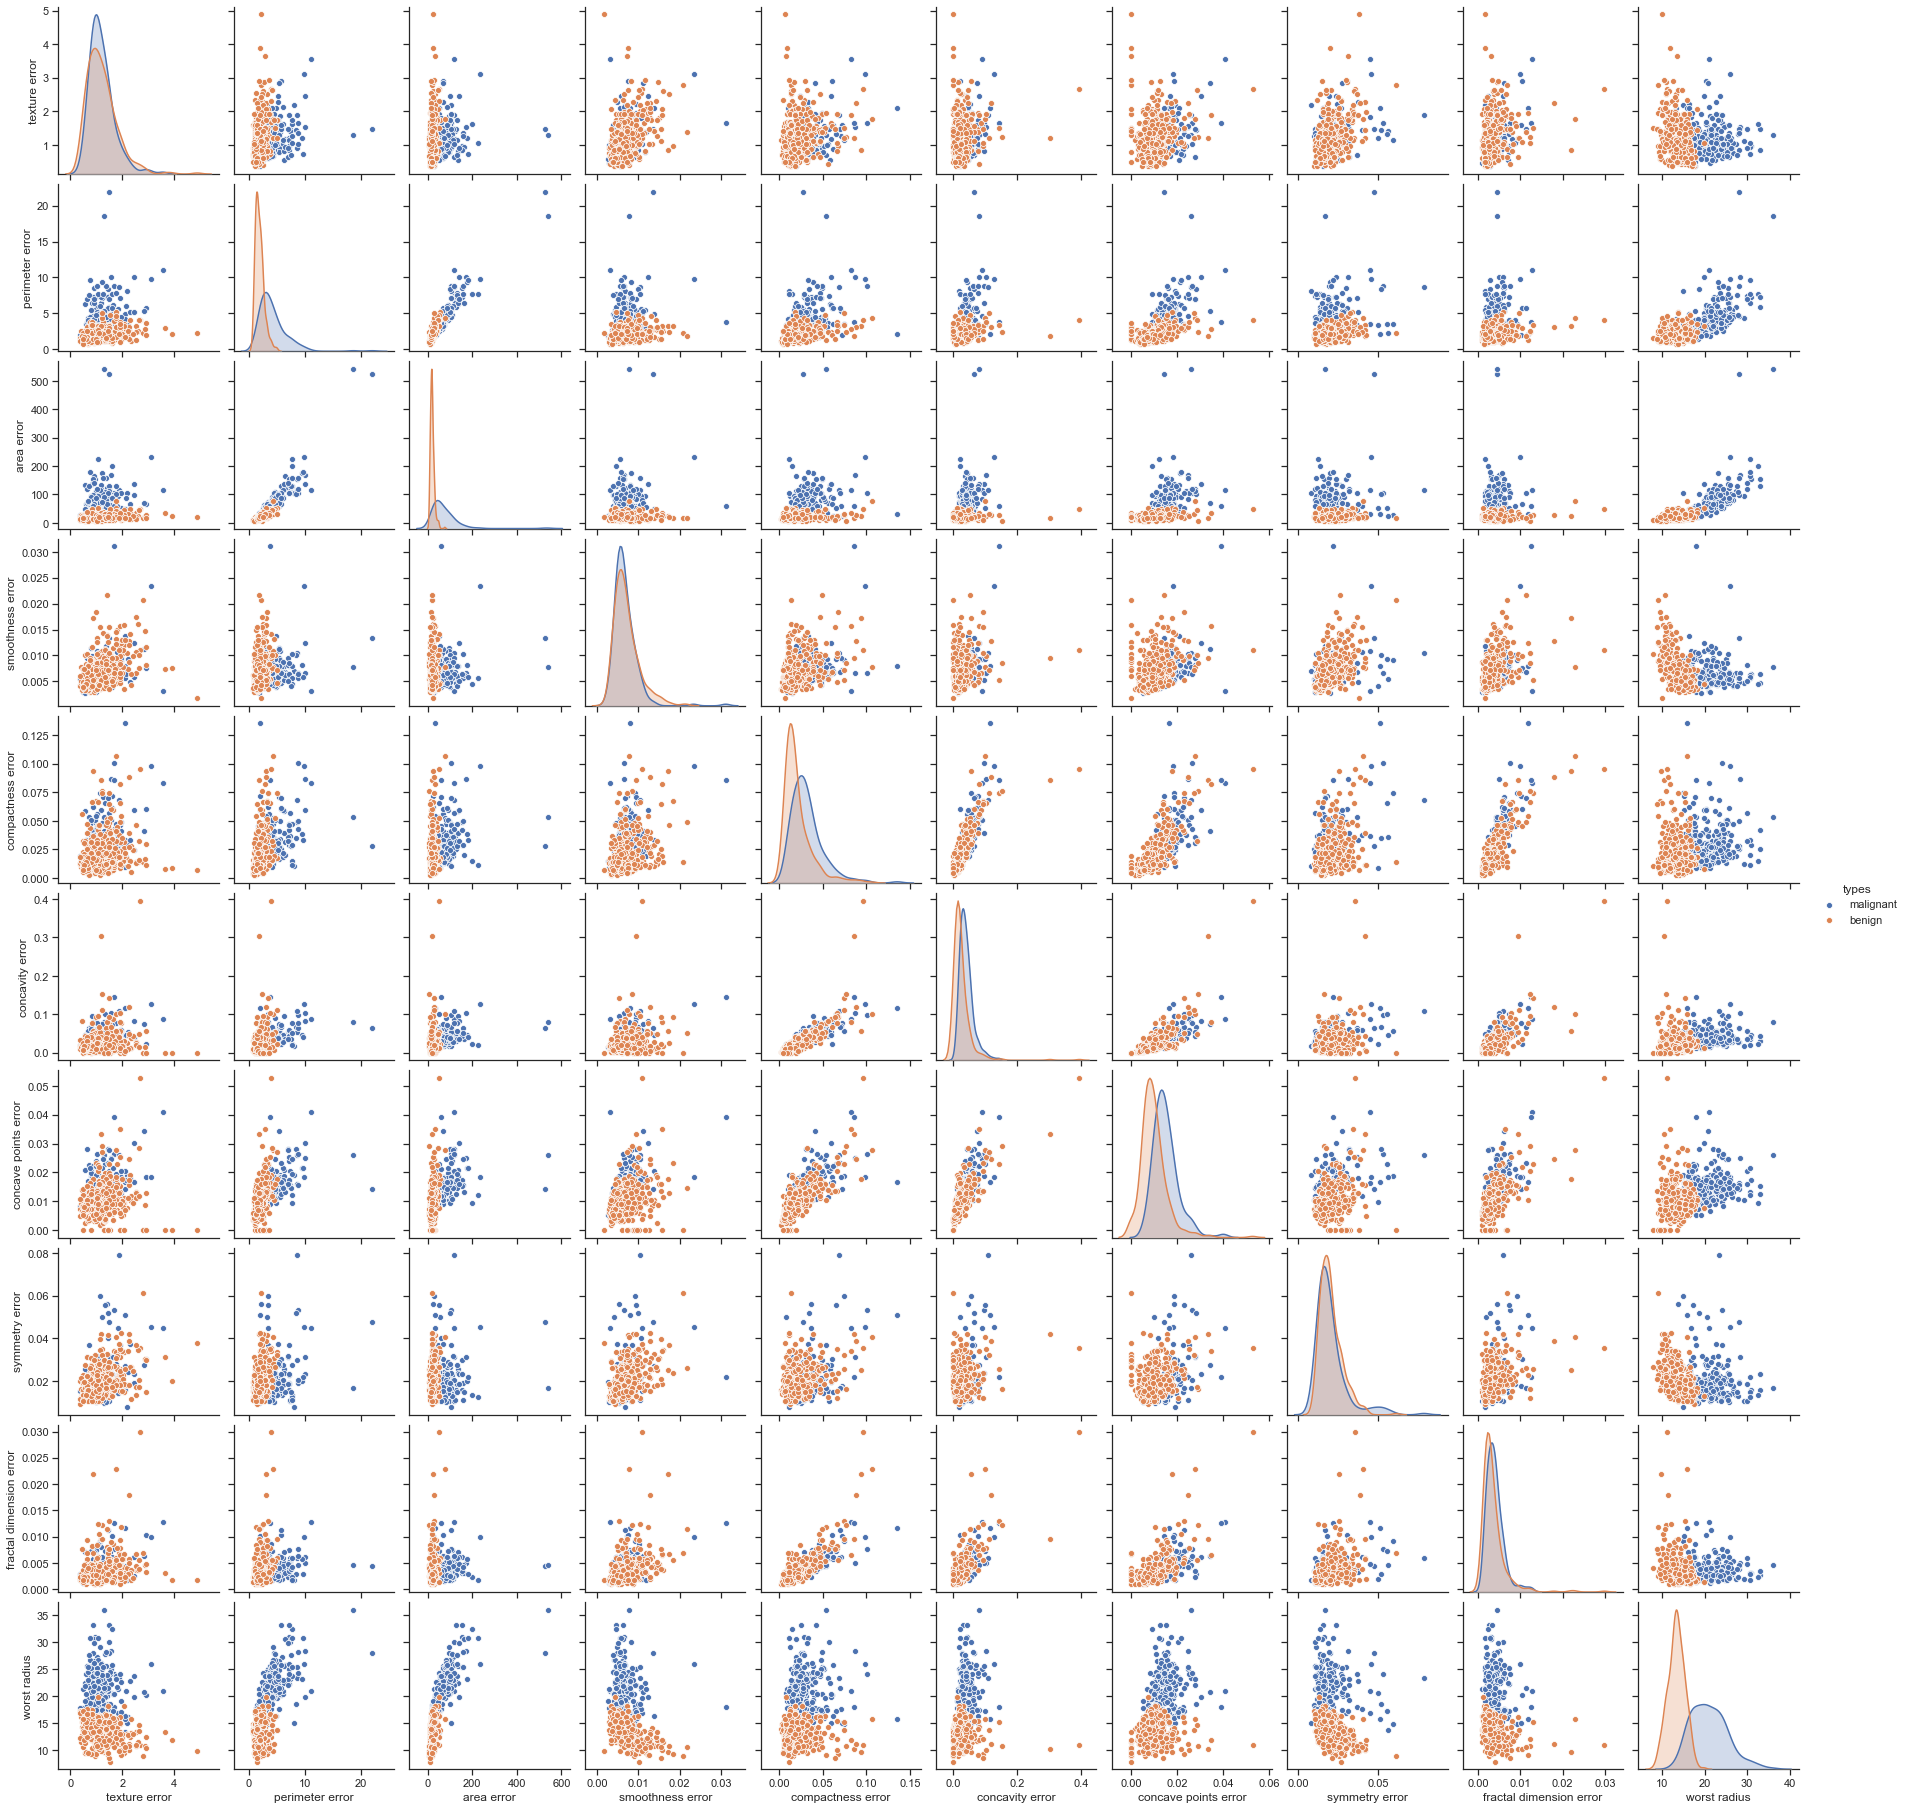

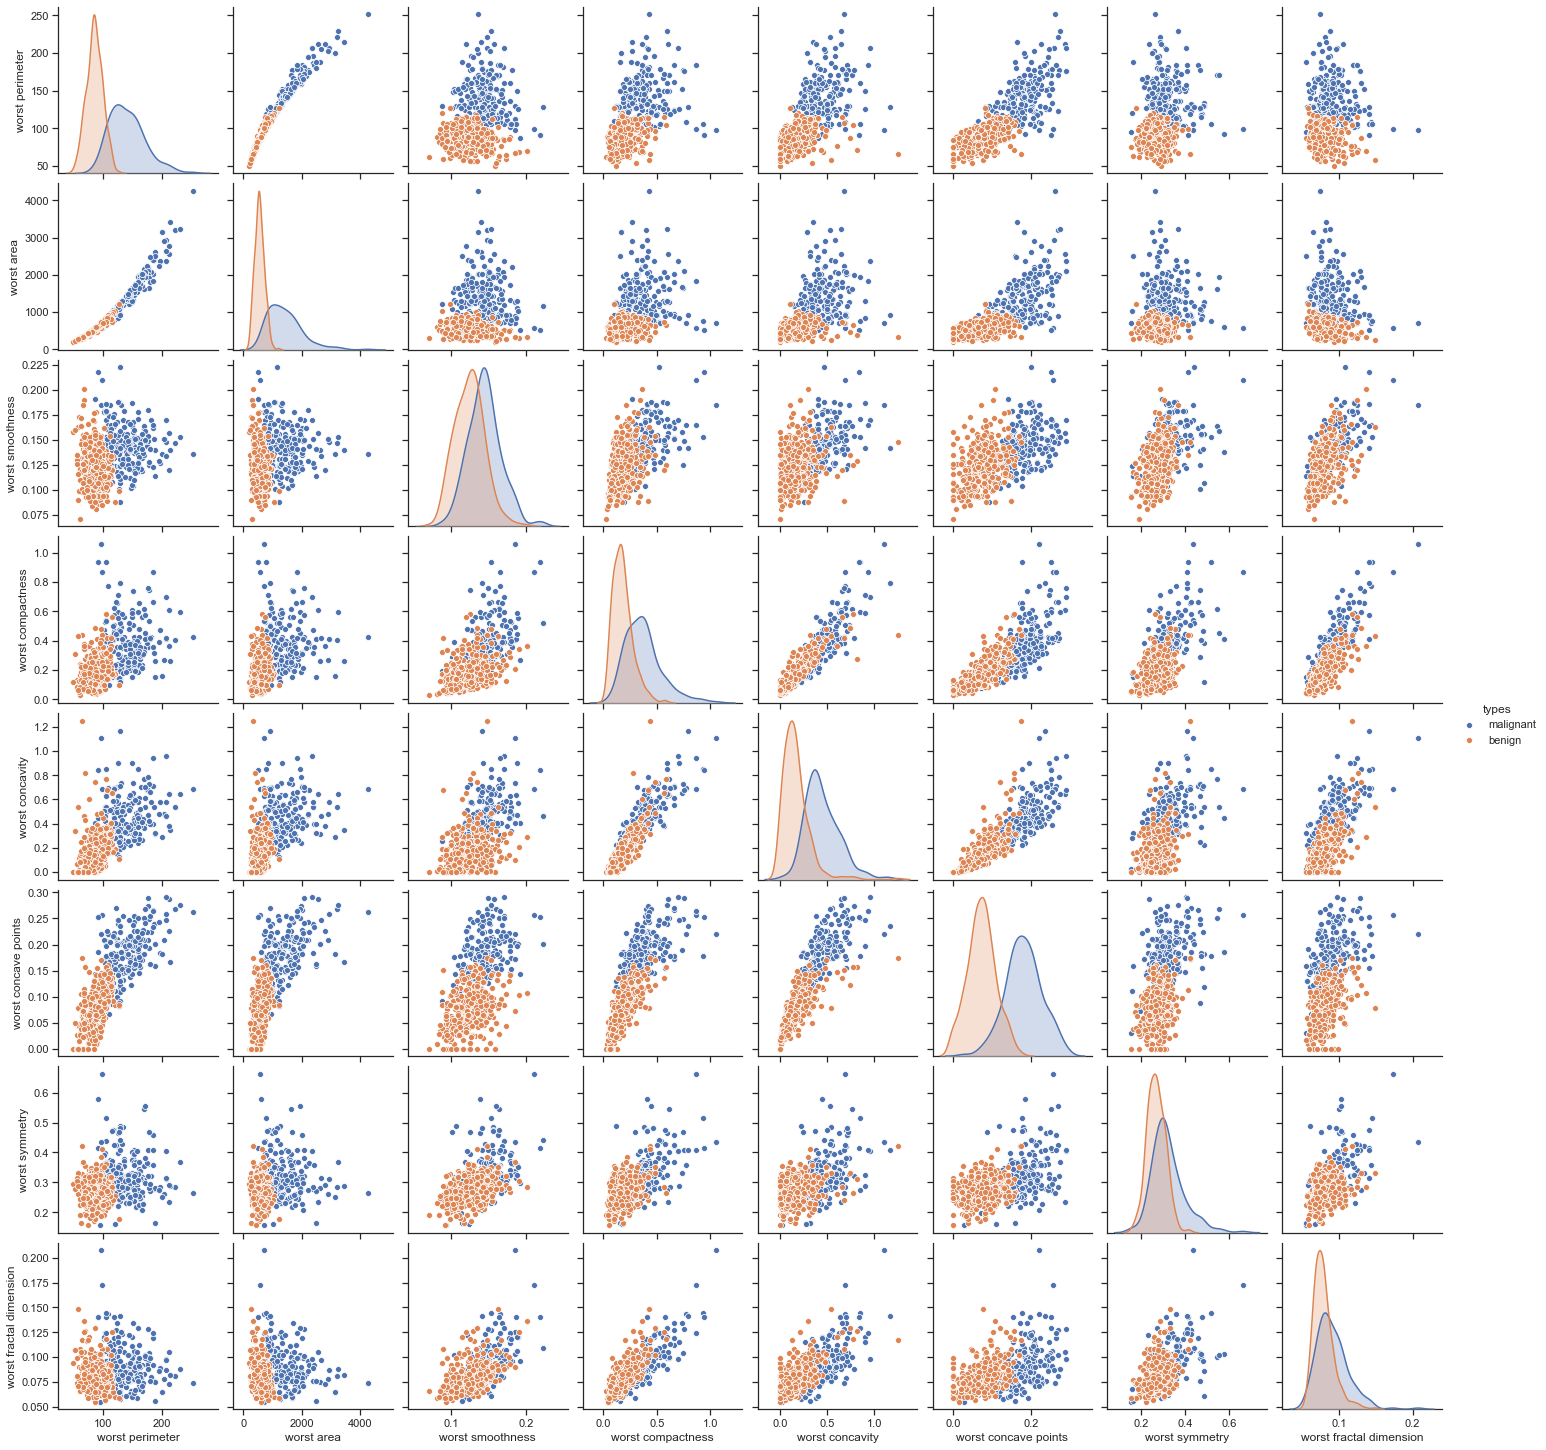

In [4]:
chunk_size = 10 

# pandas thinks I'm wrong (I checked that the copy warning was ok, but did'nt want it in the final notebook)
warnings.filterwarnings(action='ignore')

columns = [str(x) for x in bc.feature_names] + ['types']
bc_df = pd.DataFrame(data=np.c_[bc.data, [bc.target_names[x] for x in bc.target]], columns=columns)

# make list of sections for sectioning off graphs
sections = [(s, s+chunk_size) for s in range(0, len(bc_df.columns), chunk_size+1)]

# me and pandas aren't getting along
types = [t for t in bc_df['types']]

# plot sections of the total data
for s1, s2 in sections:
    bc_df_chunk = bc_df.iloc[:, s1:s2]
    bc_df_chunk['types'] = types
    
    #print(bc_df_chunk)
    
    cols = bc_df_chunk.columns.drop('types')
    
    bc_df_chunk[cols] = bc_df_chunk[cols].apply(pd.to_numeric)
    g = sns.pairplot(bc_df_chunk, hue='types')
    plt.show()
    
# put warnings back on default
# warnings.filterwarnings(action='default')

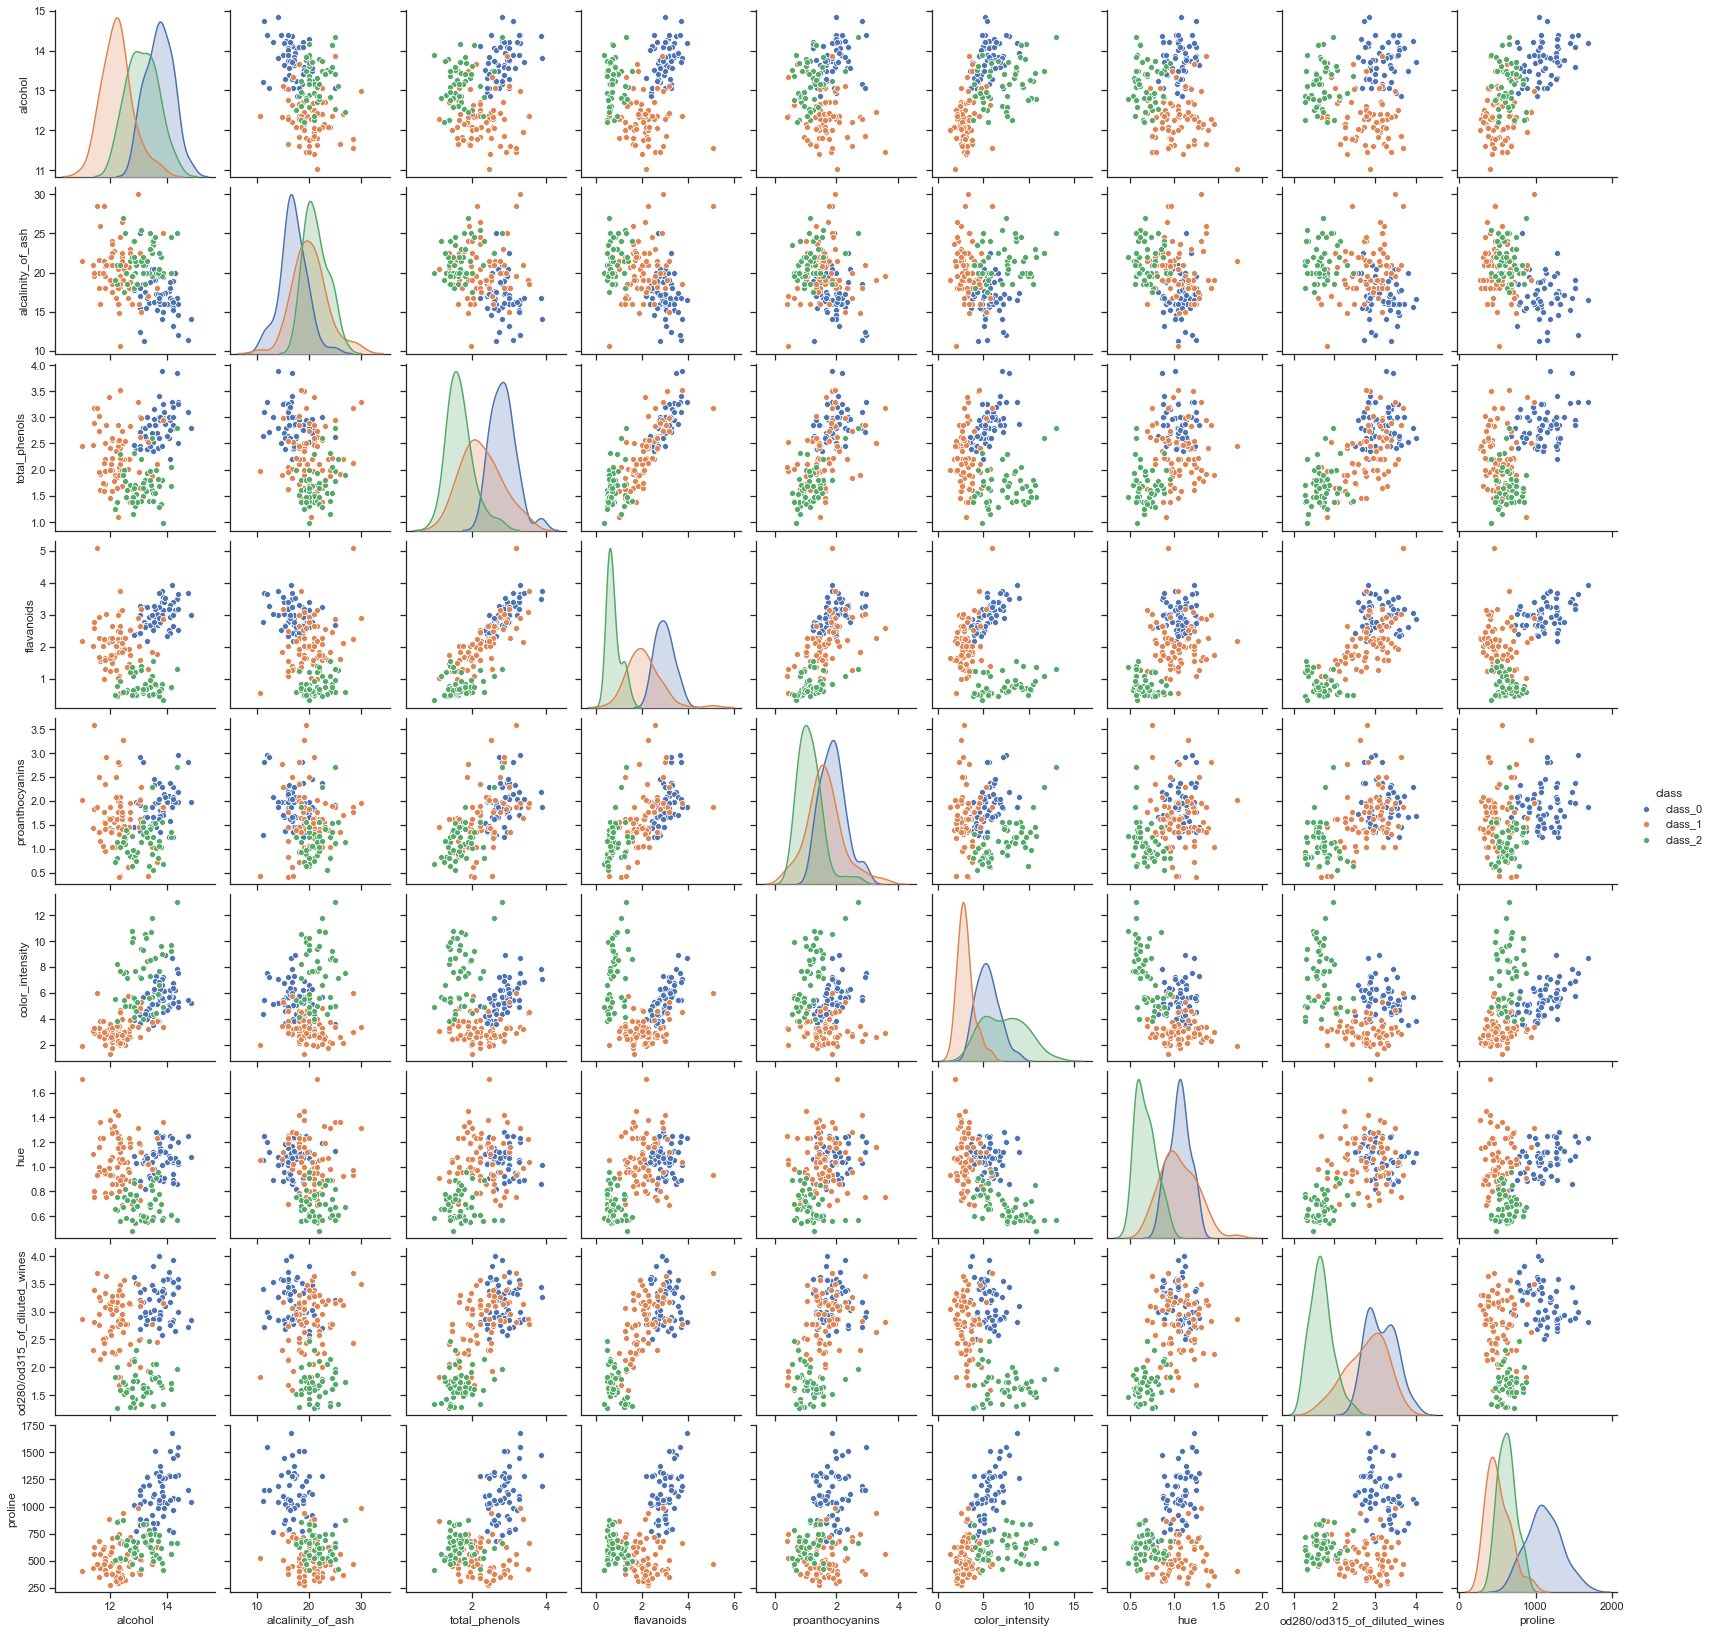

In [5]:
wine_df = pd.DataFrame(data=np.c_[wine.data, [wine.target_names[x] for x in wine.target]],
                       columns = wine.feature_names + ['class'])

wine_df = wine_df.drop(['ash', 'malic_acid', 'magnesium', 'nonflavanoid_phenols'], axis=1)
cols = wine_df.columns.drop('class')

wine_df[cols] = wine_df[cols].apply(pd.to_numeric)
g = sns.pairplot(wine_df, hue='class')
plt.show()

## *4. Discuss an unsupervised clustering algorithm*

A popular method of clustering is K-means clustering.
K-means clustering begins by picksing random points from the data as the center for the clusters. Each datapoint fed to the algorithm is assigned to the nearest cluster. We then move the center of the cluster to the average position of the assigned datapoints repeating the assignment and movement steps for each iteration. Iteration ends via a counter, lack of movement of cluster centers, or by error convergence.

If we were to implement this on the iris data we could likely obtain a fairly accurate represention of the data with a 3-cluster of "petal length" and "sepal length", as there is little overlap. 

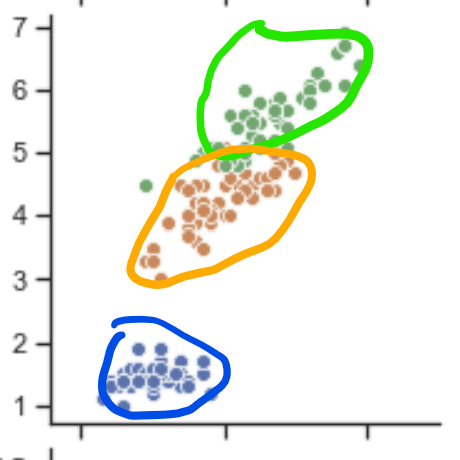

I see no obvious 4-clusters in any of the data I hava available, but would posit it would likely work 

In our case here since we have labeled data we can use the labels to better pick out the initial clusters as we know what classes we expect the data to end up. The labeled data can also be used to determine accuracy of the cluster with a training set and a testing set in much the same way the module 1 notebook did for the MNIST SVM.

_Reference:_

_\[1\] Raschka, Sebastian, and Vahid Mirjalili. Python Machine Learning : Machine Learning and Deep Learning with Python, Scikit-Learn, and TensorFlow 2, 3rd Edition, Packt Publishing, Limited, 2019. ProQuest Ebook Central, https://ebookcentral.proquest.com/lib/jhu/detail.action?docID=6005547._

### *5. Naive Bayes and Decision Trees on Iris Data*

* Using default parameters the Descision Tree has the higher performance overall. However performance of both tends to vary greatly depending on the results of the sample in cell 6.

* Increasing the size of the training set does tend to help.

* Performance tends to peak when the training set is approximately 65-75% or the total (see cell 8; doesn't always work out probably due to label distribution).

#### Data process

Function to get data into usable format

In [6]:
# get all data
iris = datasets.load_iris()

# get raw data and lable
iris_data = iris['data']
iris_labels = list(map(lambda tar: iris['target_names'][tar], iris['target']))

labeled_data = list(zip(iris_data, iris_labels))

iris_data = [d[0] for d in labeled_data]
iris_labels = [l[1] for l in labeled_data]

def sample_data(training_frac=0.5, iris_data=iris_data, iris_labels=iris_labels):
    # separate data into training testing
    training_size = int(training_frac * len(iris_data))
    
    training_idx = random.sample(range(0, len(iris_data)), k=training_size)
    testing_idx = [idx for idx in range(0, len(iris_data)) if idx not in training_idx]
    
    assert(len(training_idx) + len(testing_idx) == len(iris_data))
    
    training_set = [iris_data[idx] for idx in training_idx]
    training_labels = [iris_labels[idx] for idx in training_idx]

    testing_set = [iris_data[idx] for idx in testing_idx]
    testing_labels = [iris_labels[idx] for idx in testing_idx]
    
    return (training_set, training_labels), (testing_set, testing_labels)

#### Train and Verify

Run the classifiers and gather the error into plottable struct

In [7]:
# run the designated classifier
def run_classifier(classifier, training, testing):
    classifier.fit(*training)

    expect = testing[1]
    predict = classifier.predict(testing[0])
    
    return expect, predict

# collect data on training size plateau
def simulate():
    # progress through range of testing data sizes
    nb_acc = []
    tree_acc = []
    training_fracs = [x/1000 for x in range(500, 850, 25)]

    for i in training_fracs:
        nb = naive_bayes.CategoricalNB()
        dt = tree.DecisionTreeClassifier()
        training, testing = sample_data(i)
        
        nb_expect, nb_predict = run_classifier(nb, training, testing)
        dt_expect, dt_predict = run_classifier(dt, training, testing)
        
        nb_acc.append(metrics.accuracy_score(nb_expect, nb_predict))
        tree_acc.append(metrics.accuracy_score(dt_expect, dt_predict))
        
    return nb_acc, tree_acc, training_fracs
        
nb_acc, tree_acc, fracs = simulate()
    
print(f"Naive Bayes accuracy @ 50% training: {nb_acc[0]}")
print(f"Decision Tree accuracy @ 50% training: {tree_acc[0]}")

75 75 150
78 72 150
82 68 150
86 64 150
90 60 150
93 57 150
97 53 150
101 49 150
105 45 150
108 42 150
112 38 150
116 34 150
120 30 150
123 27 150
Naive Bayes accuracy @ 50% training: 0.9333333333333333
Decision Tree accuracy @ 50% training: 0.9333333333333333


#### Plot accuracy curves

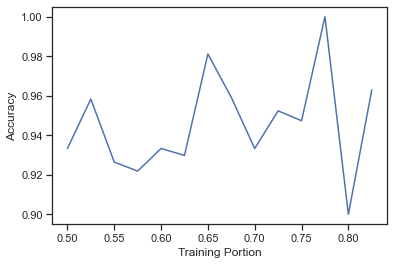

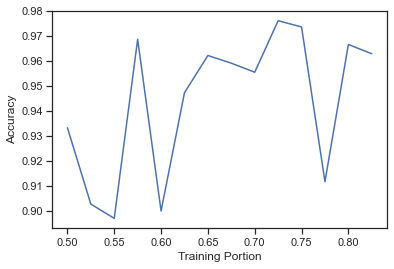

In [8]:
sns.lineplot(fracs, nb_acc)
plt.xlabel('Training Portion')
plt.ylabel('Accuracy')
plt.show()

sns.lineplot(fracs, tree_acc)
plt.xlabel('Training Portion')
plt.ylabel('Accuracy')
plt.show()